In [194]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean 
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import scipy as sp
import scipy.special 
nu = 0.05
drhobar = -4449.54142238117
import scipy.ndimage
%matplotlib inline

First load data and predictions for each time step and define surrogate model

In [195]:
#Model name
model = 'shearr_mixed_all'

In [196]:
T = 'T=1'
predictions = np.load(model+'_pred_'+T+'.npy')
true= np.load('test_data/' + T+'/test_dissipation.npy')
dudz = np.load('test_data/' + T+'/test_dudz.npy')
dvdz = np.load('test_data/' + T+'/test_dvdz.npy')
drdz = np.load('test_data/' + T+'/test_drdz.npy')
grads = np.load(model+'_grads_'+T+'.npy')
surrogate = 15/4*nu*(dudz**2+dvdz**2)

In [197]:
T = 'T=2'
predictions2 = np.load(model+'_pred_'+T+'.npy')
true2 = np.load('test_data/' + T+'/test_dissipation.npy')
dudz = np.load('test_data/' + T+'/test_dudz.npy')
dvdz = np.load('test_data/' + T+'/test_dvdz.npy')
drdz = np.load('test_data/' + T+'/test_drdz.npy')
grads = np.load(model+'_grads_'+T+'.npy')
surrogate2 = 15/4*nu*(dudz**2+dvdz**2)

In [198]:
T = 'T=4'
predictions4 = np.load(model+'_pred_'+T+'.npy')
true4 = np.load('test_data/' + T+'/test_dissipation.npy')
dudz = np.load('test_data/' + T+'/test_dudz.npy')
dvdz = np.load('test_data/' + T+'/test_dvdz.npy')
drdz = np.load('test_data/' + T+'/test_drdz.npy')
grads = np.load(model+'_grads_'+T+'.npy')
surrogate4 = 15/4*nu*(dudz**2+dvdz**2)

In [199]:
T = 'T=6'
predictions6 = np.load(model+'_pred_'+T+'.npy')
true6 = np.load('test_data/' + T+'/test_dissipation.npy')
dudz = np.load('test_data/' + T+'/test_dudz.npy')
dvdz = np.load('test_data/' + T+'/test_dvdz.npy')
drdz = np.load('test_data/' + T+'/test_drdz.npy')
grads = np.load(model+'_grads_'+T+'.npy')
surrogate6 = 15/4*nu*(dudz**2+dvdz**2)

In [200]:
T = 'T=8'
predictions8 = np.load(model+'_pred_'+T+'.npy')
true8 = np.load('test_data/' + T+'/test_dissipation.npy')
dudz = np.load('test_data/' + T+'/test_dudz.npy')
dvdz = np.load('test_data/' + T+'/test_dvdz.npy')
drdz = np.load('test_data/' + T+'/test_drdz.npy')
grads = np.load(model+'_grads_'+T+'.npy')
surrogate8 = 15/4*nu*(dudz**2+dvdz**2)

Code for producing figure 2

/autofs/nccs-svm1_home1/sl918/myenv/lib64/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/autofs/nccs-svm1_home1/sl918/myenv/lib64/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


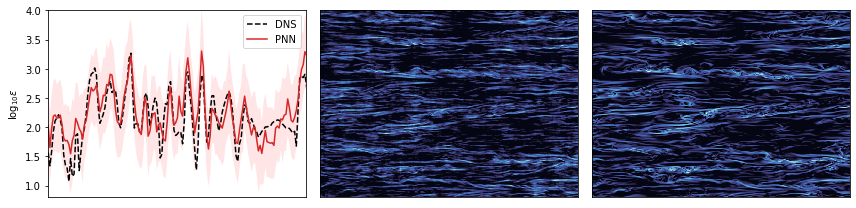

In [201]:
true_column = np.log10(true8[250, 50:350])
ensemble_predictions = np.load(model+'_ensemble_pred_T=8.npy')
mu = np.mean(ensemble_predictions, axis=0)[250,50:350,0]
std = np.std(ensemble_predictions, axis=0)[250,50:350,0]
plt.rcParams.update({'font.size': 10})
f, (ax3, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(12,3))
f.subplots_adjust(wspace=0.05)
ax3.plot(np.linspace(0,4, 300), true_column, color='k', linestyle='--', label='DNS')
ax3.fill_between(np.linspace(0,4,300), mu-2*std, mu
                 +2*std,facecolor='r', alpha=0.1)
ax3.plot(np.linspace(0,4,300), mu, color='tab:red', label='PNN')
ax3.legend()
ax3.set_xlim(0,2)
ax3.set_ylim(0.8,4)
ax3.set_ylabel('$\\log_{10}\\varepsilon$')
ax3.set_xticks([])
ax1.pcolormesh(np.linspace(0,500,500),np.linspace(0,500,500), (np.mean(ensemble_predictions, axis=0)[:,:,0]).T, vmin=2, vmax=4, cmap=cmocean.cm.ice, rasterized=True)
# ax1.plot([250, 250], [50, 350], color='r')
ax1.set_xticks([])
ax1.set_yticks([])
p = ax2.pcolormesh(np.linspace(0,500,500),np.linspace(0,500,500), np.log10(true8).T, vmin=2, vmax=4, cmap=cmocean.cm.ice,rasterized=True)
ax2.set_xticks([])
ax2.set_yticks([])
f.tight_layout()
# f.savefig('figs/plots.png', dpi=1000, bbox_inches='tight')

Code for producing figure 3

In [202]:
hist1 = np.histogram(predictions,bins=100, range=(-2,6), density=True)
hist21 = np.histogram(np.log10(true),bins=100, range=(-2,6), density=True)
hist31 = np.histogram(np.log10(surrogate),bins=100, range=(-2,6), density=True)

hist2 = np.histogram(predictions2,bins=100, range=(-2,6), density=True)
hist22 = np.histogram(np.log10(true2),bins=100, range=(-2,6), density=True)
hist32 = np.histogram(np.log10(surrogate2),bins=100, range=(-2,6), density=True)

hist4 = np.histogram(predictions4,bins=100, range=(-2,6), density=True)
hist24 = np.histogram(np.log10(true4),bins=100, range=(-2,6), density=True)
hist34 = np.histogram(np.log10(surrogate4),bins=100, range=(-2,6), density=True)

hist6 = np.histogram(predictions6,bins=100, range=(-2,6), density=True)
hist26 = np.histogram(np.log10(true6),bins=100, range=(-2,6), density=True)
hist36 = np.histogram(np.log10(surrogate6),bins=100, range=(-2,6), density=True)

hist8 = np.histogram(predictions8,bins=100, range=(-2,6), density=True)
hist28 = np.histogram(np.log10(true8),bins=100, range=(-2,6), density=True)
hist38 = np.histogram(np.log10(surrogate8),bins=100, range=(-2,6), density=True)


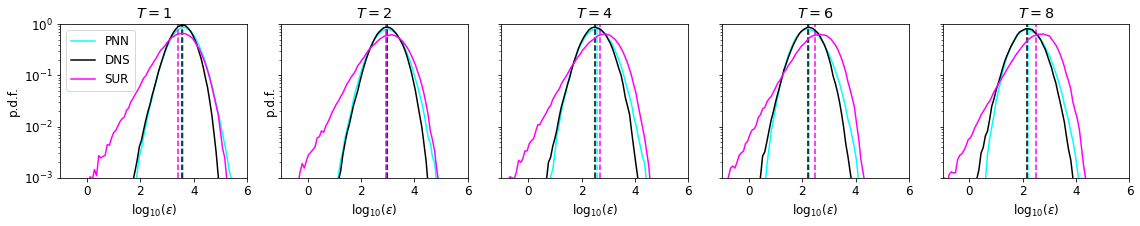

In [203]:
plt.rcParams.update({'font.size': 12})
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(16,3.3))
ax1.plot(0.5*(hist1[1][1:]+hist1[1][:-1]),hist1[0], color='cyan', label='PNN')
ax1.axvline(np.mean(predictions), linestyle='--', color='cyan')
ax1.axvline(np.mean(np.log10(true)), linestyle='--', color='k')
ax1.axvline(np.mean(np.log10(surrogate)), linestyle='--', color='magenta')
ax1.plot(0.5*(hist21[1][1:]+hist21[1][:-1]),hist21[0], color='k', label='DNS')
ax1.plot(0.5*(hist31[1][1:]+hist31[1][:-1]),hist31[0], color='magenta', label='SUR')
ax1.legend(loc='upper left')
ax1.set_yscale('log')
ax1.set_xlim(-1,6)
ax1.set_ylim(10**-3,1)
ax1.set_ylabel('p.d.f.')
ax1.set_xlabel('$\\log_{10}(\\varepsilon)$')
ax1.set_title('$T=1$')

ax2.plot(0.5*(hist2[1][1:]+hist2[1][:-1]),hist2[0], color='cyan', label='PNN')
ax2.axvline(np.mean(predictions2), linestyle='--', color='cyan')
ax2.axvline(np.mean(np.log10(true2)), linestyle='--', color='k')
ax2.axvline(np.mean(np.log10(surrogate2)), linestyle='--', color='magenta')
ax2.plot(0.5*(hist22[1][1:]+hist22[1][:-1]),hist22[0], color='k', label='DNS')
ax2.plot(0.5*(hist32[1][1:]+hist32[1][:-1]),hist32[0], color='magenta', label='SUR')
ax2.set_yscale('log')
ax2.set_xlim(-1,6)
ax2.set_ylim(10**-3,1)
ax2.set_ylabel('p.d.f.')
ax2.set_xlabel('$\\log_{10}(\\varepsilon)$')
ax2.set_title('$T=2$')


ax3.plot(0.5*(hist4[1][1:]+hist4[1][:-1]),hist4[0], color='cyan', label='PNN')
ax3.axvline(np.mean(predictions4), linestyle='--', color='cyan')
ax3.axvline(np.mean(np.log10(true4)), linestyle='--', color='k')
ax3.axvline(np.mean(np.log10(surrogate4)), linestyle='--', color='magenta')
ax3.plot(0.5*(hist24[1][1:]+hist24[1][:-1]),hist24[0], color='k', label='DNS')
ax3.plot(0.5*(hist34[1][1:]+hist34[1][:-1]),hist34[0], color='magenta', label='SUR')
ax3.set_yscale('log')
ax3.set_xlim(-1,6)
ax3.set_ylim(10**-3,1)
ax3.set_xlabel('$\\log_{10}(\\varepsilon)$')
ax3.set_title('$T=4$')

ax4.plot(0.5*(hist6[1][1:]+hist6[1][:-1]),hist6[0], color='cyan', label='PNN')
ax4.axvline(np.mean(predictions6), linestyle='--', color='cyan')
ax4.axvline(np.mean(np.log10(true6)), linestyle='--', color='k')
ax4.axvline(np.mean(np.log10(surrogate6)), linestyle='--', color='magenta')
ax4.plot(0.5*(hist26[1][1:]+hist26[1][:-1]),hist26[0], color='k', label='DNS')
ax4.plot(0.5*(hist36[1][1:]+hist36[1][:-1]),hist36[0], color='magenta', label='SUR')
ax4.set_yscale('log')
ax4.set_xlim(-1,6)
ax4.set_ylim(10**-3,1)
ax4.set_xlabel('$\\log_{10}(\\varepsilon)$')
ax4.set_title('$T=6$')


ax5.plot(0.5*(hist8[1][1:]+hist8[1][:-1]),hist8[0], color='cyan', label='PNN')
ax5.axvline(np.mean(predictions8), linestyle='--', color='cyan')
ax5.axvline(np.mean(np.log10(true8)), linestyle='--', color='k')
ax5.axvline(np.mean(np.log10(surrogate8)), linestyle='--', color='magenta')
ax5.plot(0.5*(hist28[1][1:]+hist28[1][:-1]),hist28[0], color='k', label='DNS')
ax5.plot(0.5*(hist38[1][1:]+hist38[1][:-1]),hist38[0], color='magenta', label='SUR')
# ax5.legend(loc='upper right')
ax5.set_yscale('log')
ax5.set_xlim(-1,6)
ax5.set_ylim(10**-3,1)
ax5.set_xlabel('$\\log_{10}(\\varepsilon)$')
ax5.set_title('$T=8$')
f.tight_layout()
# f.savefig('figs/hists.eps', dpi=600, bbox_inches='tight')

Code for producing figure 4

4.022545
3.4646578
2.150203
1.2699665
1.0767282
-13.520543
-3.2717607
-0.97441757
-0.6114337
-0.56333226


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


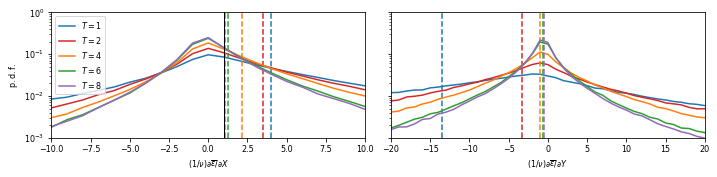

In [208]:
timesteps = ['$T=1$', '$T=2$', '$T=4$', '$T=6$', '$T=8$']
colors = ['tab:blue', 'tab:red', 'tab:orange', 'tab:green', 'tab:purple']
plt.rcParams.update({'font.size': 8})
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,2.5))
for i in range(5):
    T = T = timesteps[i][1:-1]
    grads = np.load(model+'_grads_'+T+'.npy')
    preds = np.load(model+'_pred_'+T+'.npy')
    #The model takes normalized inputs and outputs logarithmic (base 10) dissipation values so to take a gradient of dissipation with respect to 
    #un-normalized inputs we need to use the chain rule, obtaining the below expression
    grads_hist = np.histogram(np.log(10)*grads[:,:,0]*10**(preds[:,:,0])/32000/0.05, range=(-50,50), density=True, bins=100)
    mean = np.mean(np.log(10)*grads[:,:,0]*10**(preds[:,:,0])/32000/0.05)
    print(mean)
    ax1.plot(grads_hist[1][:-1],grads_hist[0], color=colors[i], label=timesteps[i])
    ax1.legend()
    ax1.set_yscale('log')
    ax1.set_ylim(0.001,1)
    ax1.set_xlim(-10,10)
    ax1.axvline(mean, linestyle='--', color=colors[i])
ax1.axvline(1, color='k', linewidth=1)
ax1.set_ylabel('$\\mathrm{p.d.f.}$')
ax1.set_xlabel('$(1/\\nu)\\partial \overline{\\varepsilon}/\partial X$')
for i in range(5):
    T = timesteps[i][1:-1]
    grads = np.load(model+'_grads_'+T+'.npy')
    preds = np.load(model+'_pred_'+T+'.npy')
    grads_hist = np.histogram(np.log(10)*grads[:,:,1]*10**(preds[:,:,0])/drhobar/0.05, range=(-50,50), density=True, bins=100)
    mean = np.mean(np.log(10)*grads[:,:,1]*10**(preds[:,:,0])/drhobar/0.05)
    print(mean)
    ax2.plot(grads_hist[1][:-1],grads_hist[0], color=colors[i], label=timesteps[i])
    ax2.set_yscale('log')
    ax2.set_ylim(0.001,1)
    ax2.set_xlim(-20,20)
    ax2.axvline(mean, linestyle='--', color=colors[i])
ax2.set_xlabel('$(1/\\nu)\\partial \overline{\\varepsilon}/\partial Y$')
f.tight_layout()
f.savefig('figs/interp.eps', dpi=600, bbox_inches='tight')